In [1]:

import numpy as np 
import pandas as pd 


In [2]:
data = pd.read_csv('datasets_156197_358170_Churn_Modelling.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
len(set(data['CustomerId']))

10000

# Average Tenure

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [7]:
def distribution(da):
    if da not in ['RowNumber','CustomerId']:
        a_string = list(str(type(data[da][0])).split('.'))
        matches = ["int64'>","float64'>"]
        if len([x for x in matches if x in a_string]) >=1:
            average = statistics.mean(data[da])
            med = statistics.median(data[da])
            mode = statistics.mode(data[da])
            sns.distplot(data[da])
            plt.axvline(x=average, c='orange',label='Average')
            plt.axvline(x=med,c='red',label='50% of sample')
            plt.axvline(x=mode,c='blue',label='most common')
            plt.title(da)
            plt.legend()
            plt.show()
            
            sns.boxplot(data[da])
            plt.title(da)
            plt.show()
            
            print(data[da].describe())

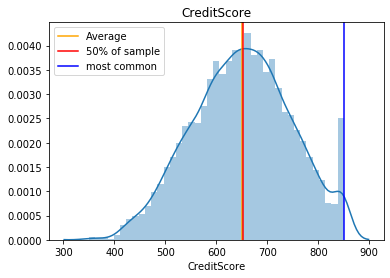

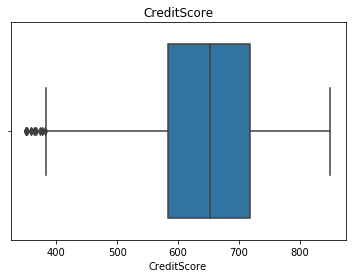

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


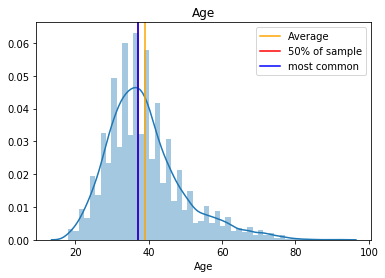

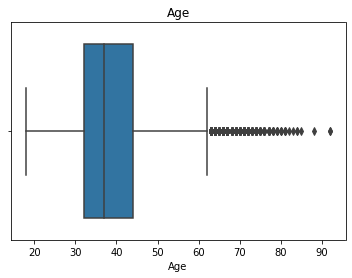

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


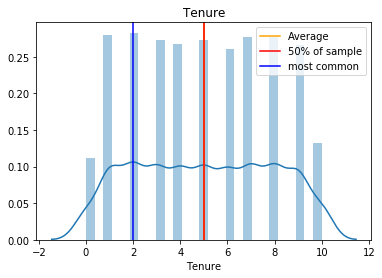

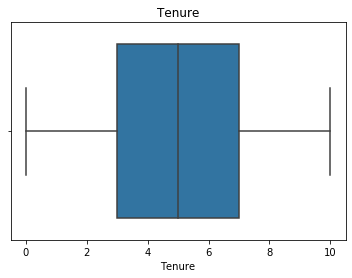

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


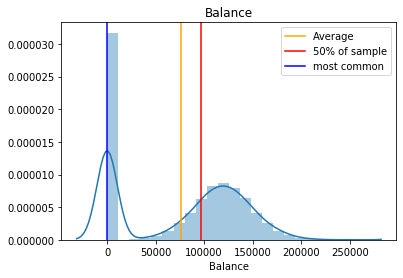

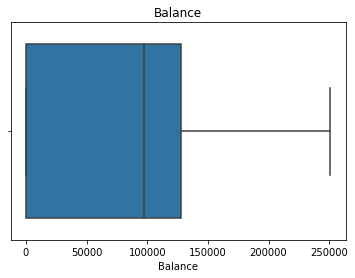

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


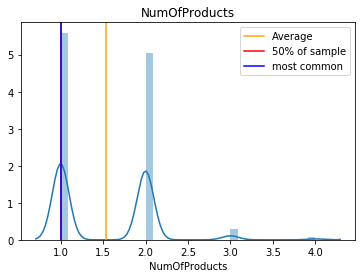

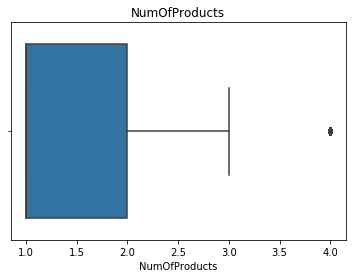

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64


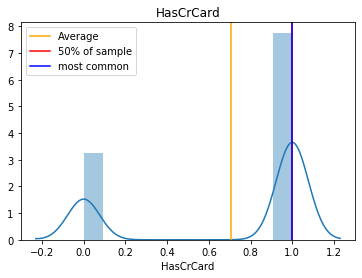

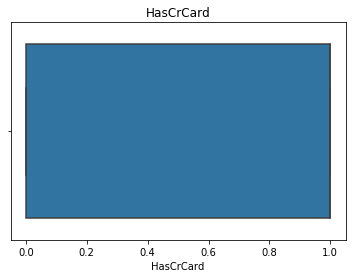

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64


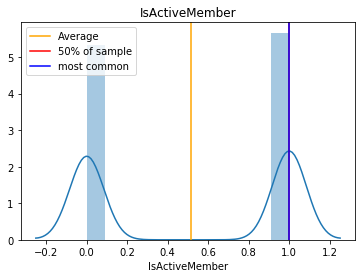

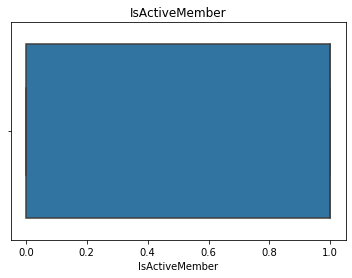

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64


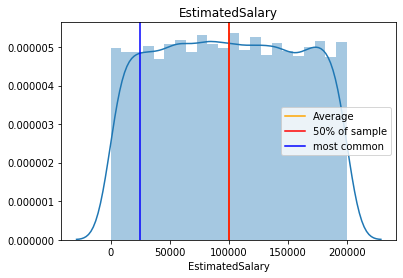

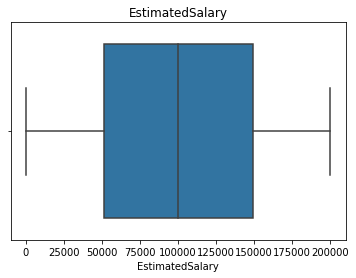

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


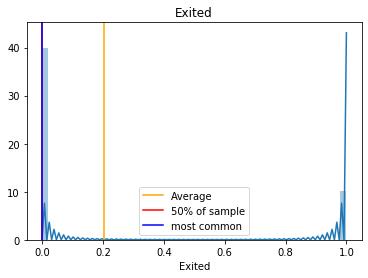

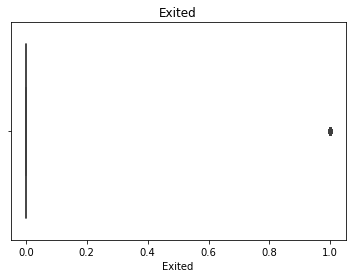

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64


In [8]:
# plt.figure(figsize=(15,10))
for i in data.columns:
    distribution(i)
    
    




<BarContainer object of 11 artists>

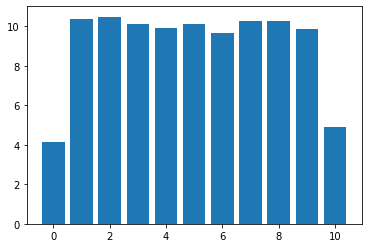

In [9]:
listoftenure = list(round(data.groupby('Tenure').count().iloc[:,0]*100/len(data),2))

plt.bar(range(len(listoftenure)),listoftenure)

In [10]:
X = data.iloc[:, 3:-1]
y = data.iloc[:, -1]
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
def data_encode(df):
    df = pd.get_dummies(data = df, columns=["Geography"], drop_first = False)
    for col in df.select_dtypes(include=['category','object']).columns:
        codes,_ = df[col].factorize(sort=True)    
        df[col]=codes
    return df

In [12]:
X = data_encode(X)
X.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
from sklearn.model_selection import train_test_split
 # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
from sklearn.linear_model import LinearRegression
#Create a Gaussian Classifier
clf=LinearRegression()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [21]:
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [22]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb')) 